## WorkShop: Árbol de Decisión modelo de Clasificación en Scikit-Learn - Titanic

1. Importar las librerías necesarias para la realización del desafío y el dataset propuesto para la ejercitación.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("Data/Ames_Housing_Data.csv")

2. Imprimir las 5 primeras filas del dataset.

In [64]:
data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


3. Imprimir las 5 últimas filas del dataset.

In [65]:
data.tail()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
2929,924151050,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,188000


4. Imprimir las dimensiones del dataset.

In [66]:
data.shape

(2930, 81)

5. Obtener la totalidad de registros por columnas

In [67]:
data.count()

PID               2930
MS SubClass       2930
MS Zoning         2930
Lot Frontage      2440
Lot Area          2930
                  ... 
Mo Sold           2930
Yr Sold           2930
Sale Type         2930
Sale Condition    2930
SalePrice         2930
Length: 81, dtype: int64

6. Analizar el tipo de dato de cada columna

In [91]:
#selecciono las columnas que seran mis casos de estudios 

df = pd.DataFrame(data, columns =['Lot Frontage', 'Lot Area','Gr Liv Area', 'Pool Area','Yr Sold','Bedroom AbvGr','SalePrice'])
df

,Lot Frontage,Lot Area,Gr Liv Area,Pool Area,Yr Sold,Bedroom AbvGr,SalePrice
0,141.0,31770,1656,0,2010,3,215000
1,80.0,11622,896,0,2010,2,105000
2,81.0,14267,1329,0,2010,3,172000
3,93.0,11160,2110,0,2010,3,244000
4,74.0,13830,1629,0,2010,3,189900
...,...,...,...,...,...,...,...
2925,37.0,7937,1003,0,2006,3,142500
2926,NaN,8885,902,0,2006,2,131000
2927,62.0,10441,970,0,2006,3,132000
2928,77.0,10010,1389,0,2006,2,170000


7. Obtener el tipo de estructura del dataset

In [69]:
type(df)

pandas.core.frame.DataFrame

In [88]:
df.shape

(2930, 6)

In [90]:
df.count()

Lot Frontage     2440
Lot Area         2930
Gr Liv Area      2930
Pool Area        2930
Yr Sold          2930
Bedroom AbvGr    2930
dtype: int64

8. Listar los nombres de las columnas

In [70]:
df.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

**Resolución**: Machine Learning - Modelo de Clasificación

9.	Separar los features en X e y

In [92]:
#dropeo NAN
df = df.dropna()
#tomo todas las columnas menos el target 
X = df.drop("SalePrice", axis=1) 
#tomo mi target 
y = df.SalePrice 

10. Separar los datos en Train (70 %) y Test (30 %) con un random_state=42.

In [93]:
from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=42) 

11.	Crear un objeto de Árbol de Decisión para un modelo de clasificación, con un Nivel de Profundidad = 2 y una Semilla para la reproducibilidad = 42

In [94]:
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo

tree = DecisionTreeClassifier(max_depth=2, random_state = 42) #Creamos el modelo

12.	Entrenar el modelo creado

In [95]:
tree.fit(X_train, y_train); #Entrenamos el modelo

13. Realizar la predicción del modelo en Train y Test

In [96]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

14.	Calcular la métrica de Accuracy en Train y Test 

In [97]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.02107728337236534
% de aciertos sobre el set de evaluación: 0.00546448087431694


15. Graficar las variables de importancia del Árbol de Decisión 

C:\Users\Nardulli\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


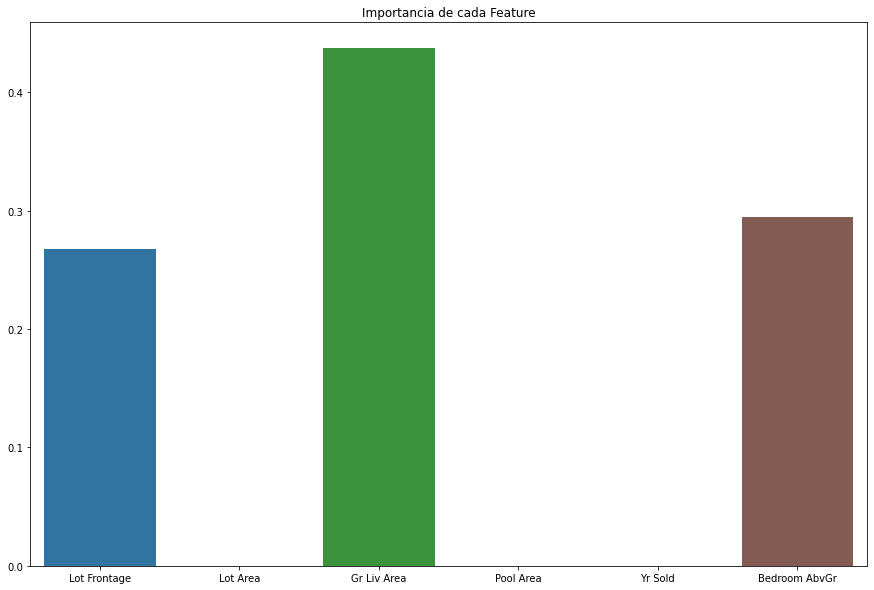

In [98]:
import seaborn as sns
plt.figure(figsize=(15,10))
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

16. Graficar el arbol de Decisión

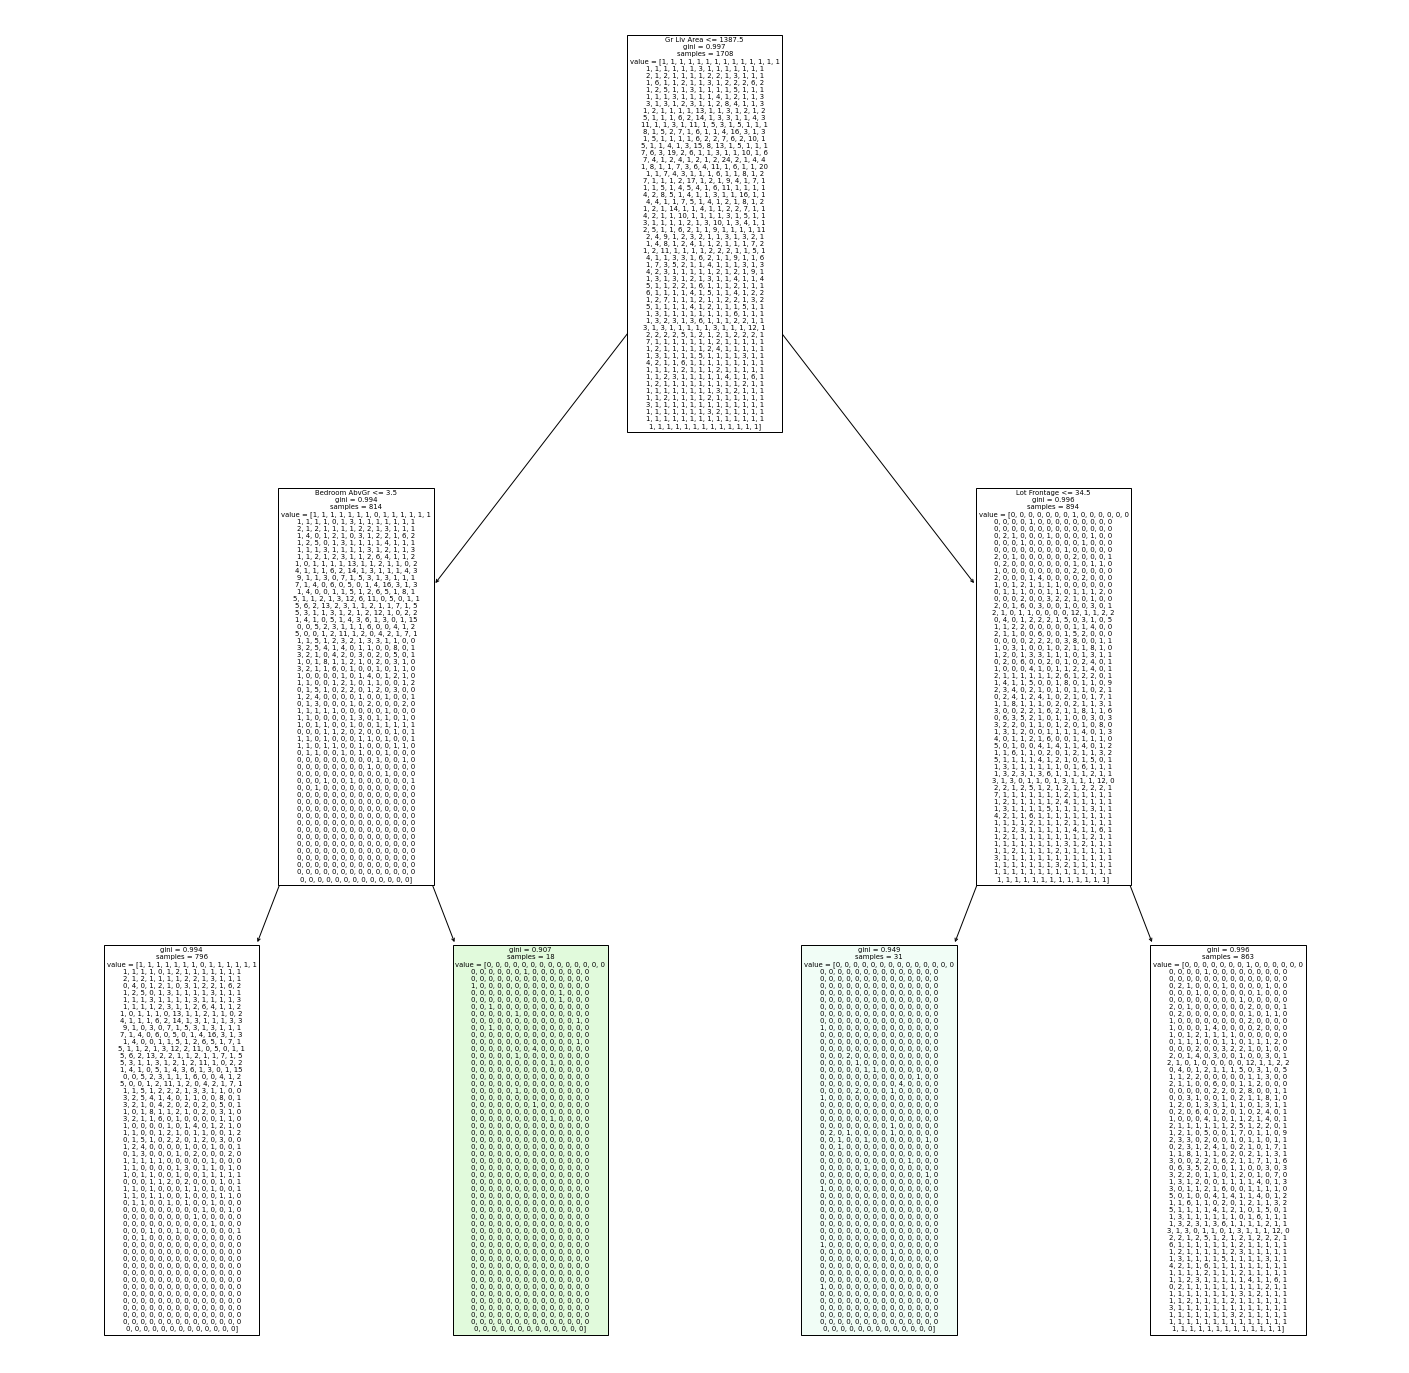

In [100]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,25))
plot_tree(decision_tree = tree, feature_names=X.columns, filled = True);